**Group Assigment #2: Census Data Exploration LA City Means of Transporation to Work**

**By:** Andrew Williams

**Partner:** Ben Bressette

**Description:** In this notebook, I downloaded ACS data for the city of Los Angeles that desribes the reisdents method of transportation to work on a census tract level. The goal of this project is two-fold. One, practice skills we learned in last in manipulating and plotting census data. Secondly, this falls in the purivew of my group project. The scope of the project is to evaluate access and mobility for different dempgrpahic compasitions in LA neighorhoods.

**Importing libraries and my dataset**

As in lab, I'm importing libraries so I can explore my chosen dataset

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

Success! Step one done. I have libraries. For reference: 

1. pd is for general data wrangling tasks

2. gpd is to read and visualize spatial data

3. ctx is to provide basemaps for maps

4. plt to give more power to my figures (plots), don't quite know what that means

Will now import my json via census reporter, I also just realized gdf means GeoDataFrame. 

In [2]:
gdf = gpd.read_file('Data/Means_Transpo_Work_Tract/acs2019_5yr_B08301_14000US06037185320.geojson')

Import success! I can explore my dataset.

**Preview of data**

Will begin a series of checks on my data to check-it out. 

In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

As expected, this data is a gdf, meaning the df has a spatial demension to it

I want to look at my data types

In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B08301001         1005 non-null   float64 
 3   B08301001, Error  1005 non-null   float64 
 4   B08301002         1005 non-null   float64 
 5   B08301002, Error  1005 non-null   float64 
 6   B08301003         1005 non-null   float64 
 7   B08301003, Error  1005 non-null   float64 
 8   B08301004         1005 non-null   float64 
 9   B08301004, Error  1005 non-null   float64 
 10  B08301005         1005 non-null   float64 
 11  B08301005, Error  1005 non-null   float64 
 12  B08301006         1005 non-null   float64 
 13  B08301006, Error  1005 non-null   float64 
 14  B08301007         1005 non-null   float64 
 15  B08301007, Error  1005 non-null   float64 
 16  B08301008       

Most of my data are float64/float. Numeric characters with decimals.

Will use the shape command to check out rows and column totals

In [5]:
gdf.shape

(1005, 45)

That's a lot of rows and columns. Rows make sense becasue that lists all the census tracts in LA. I need to check out my columns.

Checking out the first five values of my dataset.

In [6]:
gdf.head()

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,26.0,36.0,82.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,10.0,16.0,0.0,12.0,77.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,74.0,65.0,72.0,63.0,129.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,30.0,42.0,68.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,220.0,1538.0,214.0,1457.0,214.0,81.0,62.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,218.0,81.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Head came out as expected. I forget what the errors mean, but remember that happened during class. **Reminder to look up what error means in my column titles**

Checkin out the last five values

In [7]:
gdf.tail()

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,8.0,5.0,8.0,5.0,8.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1964868.0,5629.0,1541762.0,6099.0,1368251.0,6262.0,173511.0,3251.0,...,495.0,18897.0,930.0,67341.0,1930.0,25181.0,1195.0,123270.0,2531.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


My last row is a fairly significant number in comparison to the rest of my dataset. Closer inspection reveals its for the city of LA.

Curious about my column headers, I know I will have to rename them at somepoint (like a couple commands from now)

In [8]:
gdf.columns.to_list()

['geoid',
 'name',
 'B08301001',
 'B08301001, Error',
 'B08301002',
 'B08301002, Error',
 'B08301003',
 'B08301003, Error',
 'B08301004',
 'B08301004, Error',
 'B08301005',
 'B08301005, Error',
 'B08301006',
 'B08301006, Error',
 'B08301007',
 'B08301007, Error',
 'B08301008',
 'B08301008, Error',
 'B08301009',
 'B08301009, Error',
 'B08301010',
 'B08301010, Error',
 'B08301011',
 'B08301011, Error',
 'B08301012',
 'B08301012, Error',
 'B08301013',
 'B08301013, Error',
 'B08301014',
 'B08301014, Error',
 'B08301015',
 'B08301015, Error',
 'B08301016',
 'B08301016, Error',
 'B08301017',
 'B08301017, Error',
 'B08301018',
 'B08301018, Error',
 'B08301019',
 'B08301019, Error',
 'B08301020',
 'B08301020, Error',
 'B08301021',
 'B08301021, Error',
 'geometry']

Detailed list of my 45 columns. 

Going to try another list column command which I think will be a little easier to remember.

In [9]:
list(gdf)

['geoid',
 'name',
 'B08301001',
 'B08301001, Error',
 'B08301002',
 'B08301002, Error',
 'B08301003',
 'B08301003, Error',
 'B08301004',
 'B08301004, Error',
 'B08301005',
 'B08301005, Error',
 'B08301006',
 'B08301006, Error',
 'B08301007',
 'B08301007, Error',
 'B08301008',
 'B08301008, Error',
 'B08301009',
 'B08301009, Error',
 'B08301010',
 'B08301010, Error',
 'B08301011',
 'B08301011, Error',
 'B08301012',
 'B08301012, Error',
 'B08301013',
 'B08301013, Error',
 'B08301014',
 'B08301014, Error',
 'B08301015',
 'B08301015, Error',
 'B08301016',
 'B08301016, Error',
 'B08301017',
 'B08301017, Error',
 'B08301018',
 'B08301018, Error',
 'B08301019',
 'B08301019, Error',
 'B08301020',
 'B08301020, Error',
 'B08301021',
 'B08301021, Error',
 'geometry']

New command worked! I can see the list of column names. 

**Cleaning up dataset**

Drop the last row becasue it will skew my dataset

In [10]:
gdf = gdf.drop([1004])

Command excuted, but need to find out if it worked. 

In [11]:
gdf.tail()

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",138.0,69.0,130.0,71.0,130.0,71.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,4.0,6.0,"MULTIPOLYGON (((-118.51849 34.18389, -118.5184..."
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,8.0,5.0,8.0,5.0,8.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


The last row was dropped! 

Let's drop some other rows (sub-category of carpooling, error rows)

Link to my column header titles: https://jupyter.idre.ucla.edu/user/awwd.williams@gmail.com/edit/21W-UP206A/Z_Assignments%20/Data/Means_Transpo_Work_Tract/metadata.json

In [12]:
columns_to_keep = ['geoid',
 'name',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021',
 'geometry']

I should have dropped sub-car pooling rows and error rows. Will need to check once I redefine.

Redefining gdf with dropped columns

In [13]:
gdf= gdf [columns_to_keep]

In [14]:
gdf.sample(5)

,geoid,name,B08301001,B08301002,B08301003,B08301004,B08301010,B08301011,B08301012,B08301013,B08301014,B08301016,B08301017,B08301018,B08301019,B08301020,B08301021,geometry
943,14000US06037292000,"Census Tract 2920, Los Angeles, CA",2919.0,2142.0,2006.0,136.0,392.0,392.0,0.0,0.0,0.0,12.0,0.0,0.0,30.0,156.0,187.0,"MULTIPOLYGON (((-118.30915 33.85846, -118.3091..."
306,14000US06037137301,"Census Tract 1373.01, Los Angeles, CA",1271.0,1081.0,1030.0,51.0,14.0,14.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,11.0,161.0,"MULTIPOLYGON (((-118.64332 34.17316, -118.6432..."
72,14000US06037109603,"Census Tract 1096.03, Los Angeles, CA",1952.0,1788.0,1596.0,192.0,110.0,72.0,10.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,"MULTIPOLYGON (((-118.47218 34.25102, -118.4721..."
505,14000US06037201602,"Census Tract 2016.02, Los Angeles, CA",1292.0,1155.0,890.0,265.0,42.0,42.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,14.0,60.0,"MULTIPOLYGON (((-118.17714 34.07733, -118.1751..."
854,14000US06037265520,"Census Tract 2655.20, Los Angeles, CA",2696.0,2104.0,1914.0,190.0,87.0,87.0,0.0,0.0,0.0,0.0,15.0,43.0,215.0,0.0,232.0,"MULTIPOLYGON (((-118.44839 34.05241, -118.4483..."


Dope. In the previous two commands, I have successfully refined my data and check to make sure coumns were dopped via a random sample.

Let's refinde nename columns now. 

Listing columns again for quick access. 

In [15]:
list(gdf)

['geoid',
 'name',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021',
 'geometry']

Have my list of columns.

In [16]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation (excluding taxicab)',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry']

Oh sh**, did that actually work? Let's find out.

In [17]:
gdf.head()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation (excluding taxicab),Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,1656.0,204.0,59.0,36.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,82.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,1617.0,113.0,9.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,10.0,0.0,77.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,2430.0,269.0,68.0,68.0,0.0,0.0,0.0,15.0,0.0,0.0,74.0,72.0,129.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,1323.0,116.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,30.0,68.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,1457.0,81.0,26.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Super cool. It worked.I have renamed my columns.  

**Data integrity**

I'm going to get a random record

In [18]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation (excluding taxicab),Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
642,14000US06037216900,"Census Tract 2169, Los Angeles, CA",2931.0,2435.0,2164.0,271.0,43.0,4.0,39.0,0.0,0.0,0.0,0.0,29.0,99.0,52.0,273.0,"MULTIPOLYGON (((-118.36812 34.04554, -118.3681..."


I have defined a new variable that's associated with a sample from my dataset.

Using .iloc to locate the "Drove alone" column to make sure it matches.

In [19]:
random_tract.iloc[0]['Drove alone']

2164.0

And it's a match! 1046 = 1046. I should also cycle through the rest of my columns but will not tonight for the sake of time.

Let's start going through and checking our parts of the data

In [20]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 2931.0


**Simple plots**

Let's check out some data for a couple variable and then plot it.

Checking out Drive alone stats

In [21]:
gdf['Drove alone'].head()

0    1656.0
1    1617.0
2    2430.0
3    1323.0
4    1457.0
Name: Drove alone, dtype: float64

I have the first five values for Drove alone. Let's dig deeper.

Check out the mean and median of Drove alone. 

In [22]:
gdf['Drove alone'].mean()

1364.5796812749004

In [23]:
gdf['Drove alone'].median()

1308.0

Both numbers are fairly similar. That's a good sign. The above are giving me measaures of central tendancy for number of drivers per census tract. 

Let's take a look at the distribution. 

In [24]:
gdf['Drove alone'].describe()

count    1004.000000
mean     1364.579681
std       583.999243
min         0.000000
25%       981.000000
50%      1308.000000
75%      1692.750000
max      5074.000000
Name: Drove alone, dtype: float64

Above shows measures of variance, what my data looks like as a whole.

I'm going to experiment with histogram bins sizes

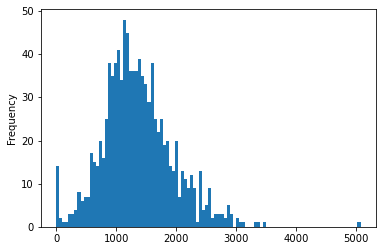

In [25]:
gdf['Drove alone'].plot.hist(bins=100)

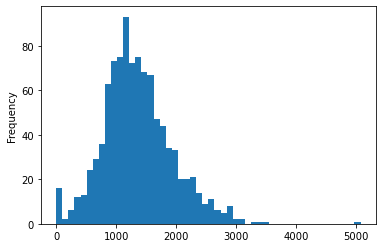

In [26]:
gdf['Drove alone'].plot.hist(bins=50)

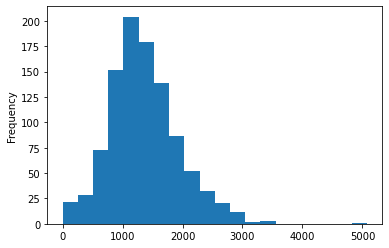

In [27]:
gdf['Drove alone'].plot.hist(bins=20)

Distribution has a slight positive skew. Not the 0 and 5000 values above. 

**Filtering, sorting, and some maps!**

I'm doing a basic map plot and enlarging the size size of my map

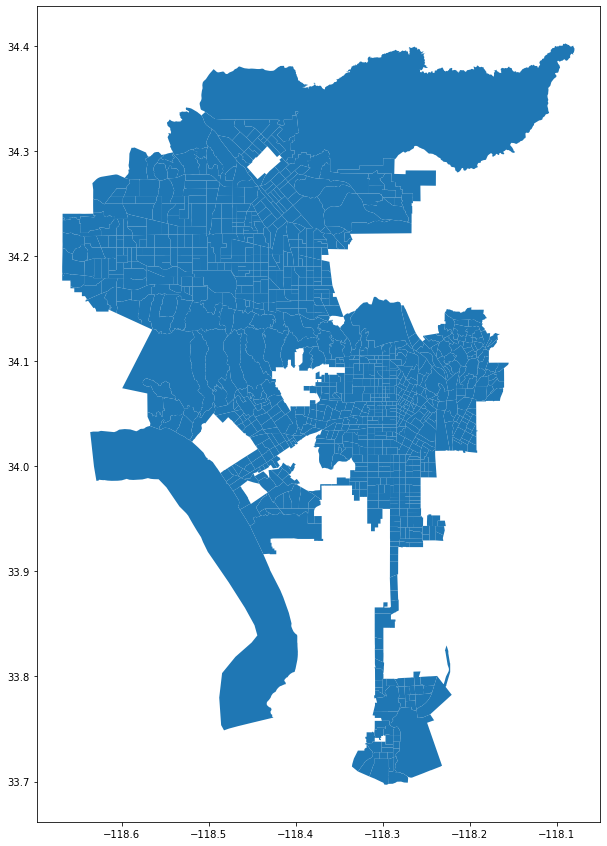

In [28]:
gdf.plot(figsize=(15,15))

Sweet. Map of the city of Los Angeles is my output.

Let's take a look at the highest public trasnportation areas 

In [29]:
gdf_sorted_1 = gdf.sort_values(by='Public transportation (excluding taxicab)',ascending = False)

I defined a new variable in ascending order.

In [30]:
gdf_sorted_1

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation (excluding taxicab),Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2995.0,1148.0,1071.0,77.0,1551.0,1488.0,58.0,5.0,0.0,0.0,0.0,41.0,175.0,14.0,66.0,"MULTIPOLYGON (((-118.27065 34.05464, -118.2704..."
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,226.0,227.0,1544.0,1510.0,0.0,0.0,34.0,0.0,0.0,28.0,123.0,36.0,35.0,"MULTIPOLYGON (((-118.27988 34.05388, -118.2797..."
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,363.0,104.0,1136.0,1125.0,0.0,11.0,0.0,0.0,0.0,140.0,139.0,45.0,69.0,"MULTIPOLYGON (((-118.27185 34.05934, -118.2713..."
561,14000US06037208903,"Census Tract 2089.03, Los Angeles, CA",2326.0,867.0,534.0,333.0,1123.0,973.0,93.0,0.0,57.0,10.0,0.0,43.0,254.0,0.0,29.0,"MULTIPOLYGON (((-118.27588 34.05793, -118.2748..."
557,14000US06037208720,"Census Tract 2087.20, Los Angeles, CA",2433.0,1075.0,742.0,333.0,1104.0,1029.0,75.0,0.0,0.0,0.0,0.0,23.0,109.0,21.0,101.0,"MULTIPOLYGON (((-118.28420 34.05995, -118.2832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,14000US06037143901,"Census Tract 1439.01, Los Angeles, CA",1844.0,1474.0,1400.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,51.0,17.0,294.0,"MULTIPOLYGON (((-118.41431 34.13427, -118.4142..."
12,14000US06037103200,"Census Tract 1032, Los Angeles, CA",2695.0,2531.0,2298.0,233.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,30.0,0.0,104.0,"MULTIPOLYGON (((-118.37303 34.27425, -118.3730..."
10,14000US06037103101,"Census Tract 1031.01, Los Angeles, CA",1208.0,1170.0,1030.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,31.0,"MULTIPOLYGON (((-118.31760 34.27387, -118.3175..."
447,14000US06037192300,"Census Tract 1923, Los Angeles, CA",1519.0,1152.0,1055.0,97.0,0.0,0.0,0.0,0.0,0.0,68.0,20.0,45.0,38.0,0.0,196.0,"MULTIPOLYGON (((-118.33472 34.07653, -118.3347..."


I can see the biggest public transportation areas.

I'm going to check out the top 10 census tracts for public transportation. 

In [31]:
gdf_sorted_1.head(10)

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation (excluding taxicab),Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2995.0,1148.0,1071.0,77.0,1551.0,1488.0,58.0,5.0,0.0,0.0,0.0,41.0,175.0,14.0,66.0,"MULTIPOLYGON (((-118.27065 34.05464, -118.2704..."
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,226.0,227.0,1544.0,1510.0,0.0,0.0,34.0,0.0,0.0,28.0,123.0,36.0,35.0,"MULTIPOLYGON (((-118.27988 34.05388, -118.2797..."
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,363.0,104.0,1136.0,1125.0,0.0,11.0,0.0,0.0,0.0,140.0,139.0,45.0,69.0,"MULTIPOLYGON (((-118.27185 34.05934, -118.2713..."
561,14000US06037208903,"Census Tract 2089.03, Los Angeles, CA",2326.0,867.0,534.0,333.0,1123.0,973.0,93.0,0.0,57.0,10.0,0.0,43.0,254.0,0.0,29.0,"MULTIPOLYGON (((-118.27588 34.05793, -118.2748..."
557,14000US06037208720,"Census Tract 2087.20, Los Angeles, CA",2433.0,1075.0,742.0,333.0,1104.0,1029.0,75.0,0.0,0.0,0.0,0.0,23.0,109.0,21.0,101.0,"MULTIPOLYGON (((-118.28420 34.05995, -118.2832..."
550,14000US06037208401,"Census Tract 2084.01, Los Angeles, CA",2401.0,1207.0,1101.0,106.0,994.0,939.0,55.0,0.0,0.0,0.0,0.0,0.0,105.0,13.0,82.0,"MULTIPOLYGON (((-118.27208 34.06389, -118.2714..."
605,14000US06037212410,"Census Tract 2124.10, Los Angeles, CA",2577.0,1303.0,1174.0,129.0,948.0,766.0,182.0,0.0,0.0,0.0,0.0,47.0,142.0,11.0,126.0,"MULTIPOLYGON (((-118.30417 34.06172, -118.3030..."
570,14000US06037209403,"Census Tract 2094.03, Los Angeles, CA",1902.0,740.0,630.0,110.0,936.0,878.0,58.0,0.0,0.0,0.0,0.0,26.0,142.0,18.0,40.0,"MULTIPOLYGON (((-118.27557 34.05386, -118.2745..."
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1478.0,379.0,243.0,136.0,859.0,836.0,23.0,0.0,0.0,0.0,0.0,47.0,166.0,4.0,23.0,"MULTIPOLYGON (((-118.27468 34.05739, -118.2736..."
568,14000US06037209401,"Census Tract 2094.01, Los Angeles, CA",2133.0,1198.0,921.0,277.0,852.0,821.0,31.0,0.0,0.0,13.0,0.0,33.0,0.0,0.0,37.0,"MULTIPOLYGON (((-118.28423 34.05683, -118.2842..."


I have my top 10 census tracts for public transportation and will now define it

In [32]:
gdf_sorted_1 = gdf_sorted_1.head(10)

In [33]:
gdf_sorted_1

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation (excluding taxicab),Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2995.0,1148.0,1071.0,77.0,1551.0,1488.0,58.0,5.0,0.0,0.0,0.0,41.0,175.0,14.0,66.0,"MULTIPOLYGON (((-118.27065 34.05464, -118.2704..."
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2219.0,453.0,226.0,227.0,1544.0,1510.0,0.0,0.0,34.0,0.0,0.0,28.0,123.0,36.0,35.0,"MULTIPOLYGON (((-118.27988 34.05388, -118.2797..."
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1996.0,467.0,363.0,104.0,1136.0,1125.0,0.0,11.0,0.0,0.0,0.0,140.0,139.0,45.0,69.0,"MULTIPOLYGON (((-118.27185 34.05934, -118.2713..."
561,14000US06037208903,"Census Tract 2089.03, Los Angeles, CA",2326.0,867.0,534.0,333.0,1123.0,973.0,93.0,0.0,57.0,10.0,0.0,43.0,254.0,0.0,29.0,"MULTIPOLYGON (((-118.27588 34.05793, -118.2748..."
557,14000US06037208720,"Census Tract 2087.20, Los Angeles, CA",2433.0,1075.0,742.0,333.0,1104.0,1029.0,75.0,0.0,0.0,0.0,0.0,23.0,109.0,21.0,101.0,"MULTIPOLYGON (((-118.28420 34.05995, -118.2832..."
550,14000US06037208401,"Census Tract 2084.01, Los Angeles, CA",2401.0,1207.0,1101.0,106.0,994.0,939.0,55.0,0.0,0.0,0.0,0.0,0.0,105.0,13.0,82.0,"MULTIPOLYGON (((-118.27208 34.06389, -118.2714..."
605,14000US06037212410,"Census Tract 2124.10, Los Angeles, CA",2577.0,1303.0,1174.0,129.0,948.0,766.0,182.0,0.0,0.0,0.0,0.0,47.0,142.0,11.0,126.0,"MULTIPOLYGON (((-118.30417 34.06172, -118.3030..."
570,14000US06037209403,"Census Tract 2094.03, Los Angeles, CA",1902.0,740.0,630.0,110.0,936.0,878.0,58.0,0.0,0.0,0.0,0.0,26.0,142.0,18.0,40.0,"MULTIPOLYGON (((-118.27557 34.05386, -118.2745..."
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1478.0,379.0,243.0,136.0,859.0,836.0,23.0,0.0,0.0,0.0,0.0,47.0,166.0,4.0,23.0,"MULTIPOLYGON (((-118.27468 34.05739, -118.2736..."
568,14000US06037209401,"Census Tract 2094.01, Los Angeles, CA",2133.0,1198.0,921.0,277.0,852.0,821.0,31.0,0.0,0.0,13.0,0.0,33.0,0.0,0.0,37.0,"MULTIPOLYGON (((-118.28423 34.05683, -118.2842..."


I have redefined my "new new" variable and will now plot it.

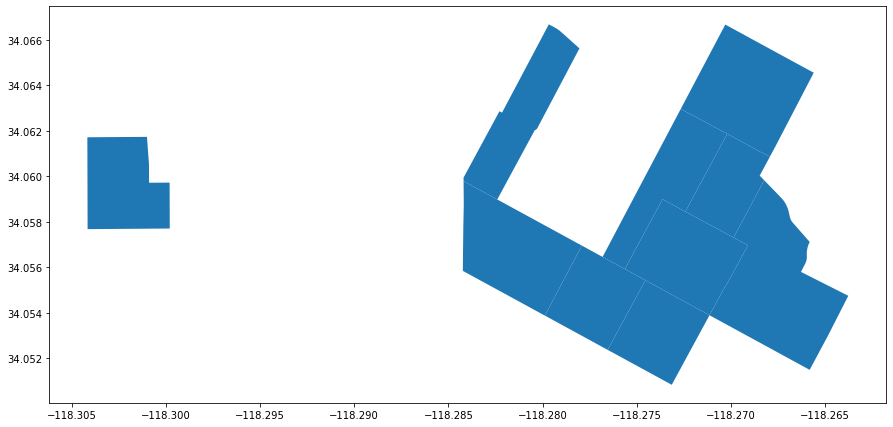

In [41]:
gdf_sorted_1.plot(figsize=(15,15))

The above shows census tracts in LA with the largest users of public trasnportion by population size.

All the above is great, but I want to see everything in proportinoality. Will create 14 different  new columns for percentage of users for each method

In [44]:
gdf['Percent Car, truck, or van'] = gdf['Car, truck, or van']/gdf['Total']*100
gdf['Percent Drove alone'] = gdf['Drove alone']/gdf['Total']*100
gdf['Percent Carpooled'] = gdf['Carpooled']/gdf['Total']*100
gdf['Percent Public transportation (excluding taxicab)'] = gdf['Public transportation (excluding taxicab)']/gdf['Total']*100
gdf['Percent Bus'] = gdf['Bus']/gdf['Total']*100
gdf['Percent Subway or elevated il'] = gdf['Subway or elevated il']/gdf['Total']*100
gdf['Percent Long-distance train or commuter rail'] = gdf['Long-distance train or commuter rail']/gdf['Total']*100
gdf['Percent Light rail, streetcar or trolley'] = gdf['Light rail, streetcar or trolley']/gdf['Total']*100
gdf['Percent Taxicab'] = gdf['Taxicab']/gdf['Total']*100
gdf['Percent Motorcycle'] = gdf['Motorcycle']/gdf['Total']*100
gdf['Percent Bicycle'] = gdf['Bicycle']/gdf['Total']*100
gdf['Percent Walked'] = gdf['Walked']/gdf['Total']*100
gdf['Percent Other means'] = gdf['Other means']/gdf['Total']*100
gdf['Percent Worked from home'] = gdf['Worked from home']/gdf['Total']*100

It only took me three times! Let's check out to see if it worked.

In [45]:
gdf.sample(5)

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation (excluding taxicab),Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
255,14000US06037131701,"Census Tract 1317.01, Los Angeles, CA",2712.0,2300.0,2225.0,75.0,120.0,105.0,0.0,0.0,...,3.871681,0.000000,0.000000,0.0,0.000000,0.000000,0.774336,0.368732,0.700590,8.923304
44,14000US06037106406,"Census Tract 1064.06, Los Angeles, CA",2773.0,2509.0,1947.0,562.0,101.0,39.0,0.0,62.0,...,1.406419,0.000000,2.235846,0.0,0.000000,1.370357,0.000000,0.000000,0.540930,3.966823
150,14000US06037120400,"Census Tract 1204, Los Angeles, CA",3315.0,3035.0,2678.0,357.0,96.0,96.0,0.0,0.0,...,2.895928,0.000000,0.000000,0.0,1.870287,0.000000,0.000000,0.000000,0.844646,2.835596
728,14000US06037231220,"Census Tract 2312.20, Los Angeles, CA",1665.0,1102.0,866.0,236.0,333.0,319.0,14.0,0.0,...,19.159159,0.840841,0.000000,0.0,0.000000,0.000000,0.780781,4.024024,3.063063,5.945946
947,14000US06037293302,"Census Tract 2933.02, Los Angeles, CA",2098.0,1878.0,1756.0,122.0,106.0,106.0,0.0,0.0,...,5.052431,0.000000,0.000000,0.0,0.953289,0.000000,0.000000,0.000000,0.619638,3.860820


And it worked. I have new columns with percentages of ridership of the total pop for each census tract.

Now the fun part. Let's map bus use.

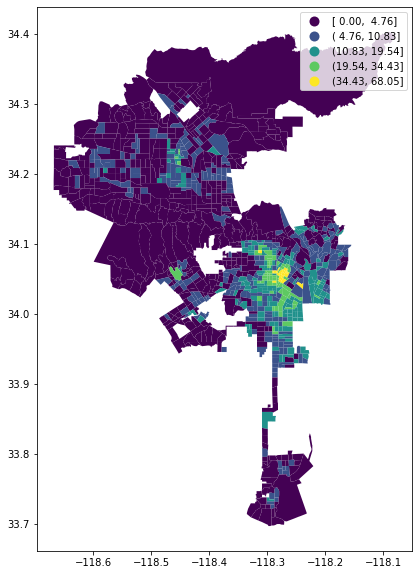

In [46]:
gdf.plot(figsize=(15,15),
                 column='Percent Bus',
                 legend=True, 
                 scheme='NaturalBreaks')

Strong clustering in parts of LA I don't quite know yet. I believe that's downtown and South LA.

I'm hoping to move to LA in six weeks, let's see where the bike users are. 

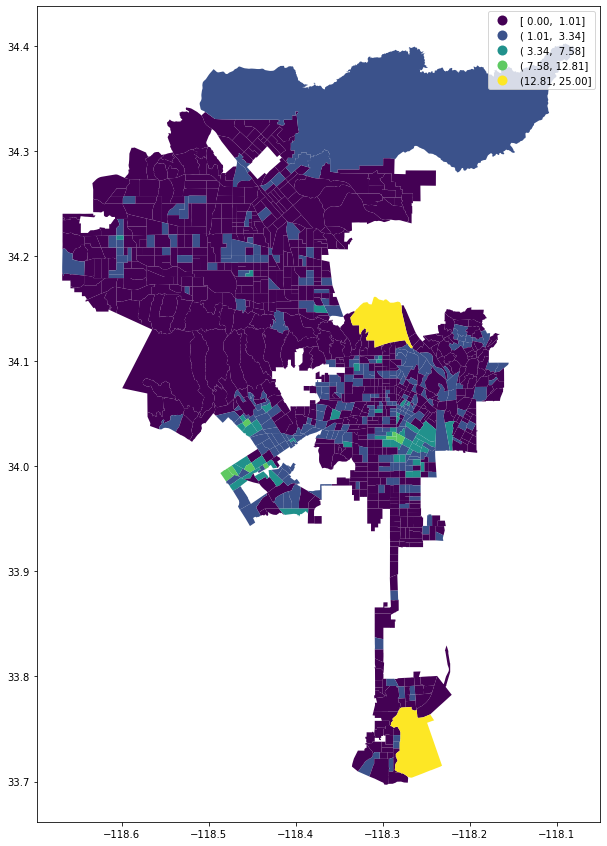

In [49]:
gdf.plot(figsize=(15,15),
                 column='Percent Bicycle',
                 legend=True, 
                 scheme='NaturalBreaks')

Looks like western LA is my spot. The there are two areas above that I want to look into just becasue (yellow).

Let's do some dual map action. I definately just copied this over.

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'Percent Bicycle')

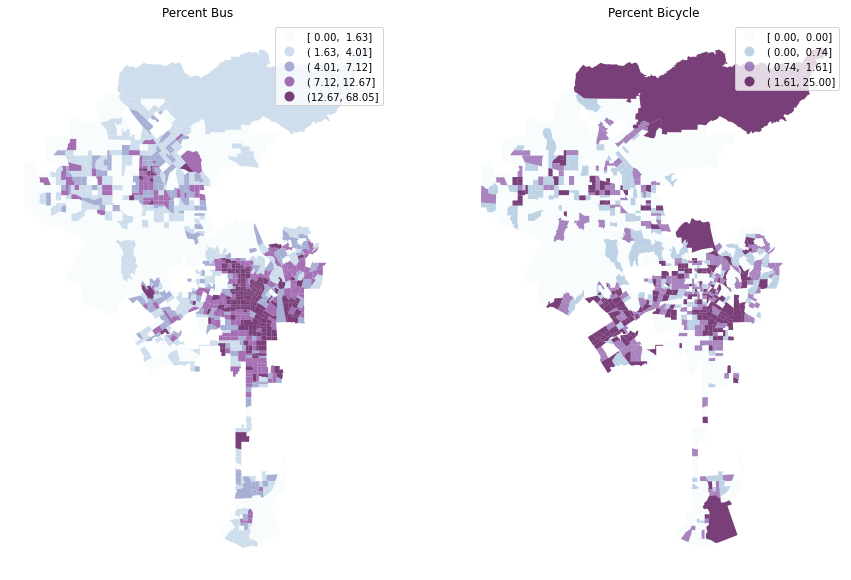

In [67]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
gdf.plot(column='Percent Bus', 
            cmap='BuPu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Bus")

# spatial lag map on the right
gdf.plot(column='Percent Bicycle', 
            cmap='BuPu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Bicycle")

Bike use is less frequent in SM area? "Heavy" bus use downtown, less cycle traffic downtown as well. I should also look into the populations in those areas.